#### KPIs:


**1. Overall rate of late returns** 

**2. Average number of days late** 

**3. Late return rate by patron** 

**4. Late return rate by patron demographics (gender, education level)**

**5. Late returns by library** 

**6. Average number of days late by library** 

**7. Late return rate by book category** 



In [15]:
import pandas as pd

# Load the data from Excel files
books = pd.read_csv('/Users/hpourmand/Desktop/Data Analyst Sample/cleaned_books.csv')
libraries = pd.read_csv('/Users/hpourmand/Desktop/Data Analyst Sample/cleaned_libraries.csv')
checkouts = pd.read_csv('/Users/hpourmand/Desktop/Data Analyst Sample/cleaned_checkouts.csv')
customers = pd.read_csv('/Users/hpourmand/Desktop/Data Analyst Sample/cleaned_customers.csv')

# Convert date columns to datetime format
checkouts['date_checkout'] = pd.to_datetime(checkouts['date_checkout'])
checkouts['date_returned'] = pd.to_datetime(checkouts['date_returned'])

# Calculate the difference between returned date and checkout date
checkouts['days_late'] = (checkouts['date_returned'] - checkouts['date_checkout']).dt.days - 28

# Determine if the book was returned late
checkouts['is_late'] = checkouts['days_late'] > 0

# Merge checkouts with customers to include demographic information
try:
    merged_data = pd.merge(checkouts, customers, left_on='patron_id', right_on='id')
except KeyError as e:
    print(f"Merge failed. KeyError: {e}")
    print("Check if the 'patron_id' column in checkouts and 'id' column in customers are present.")
    raise

# KPIs Calculation
# KPI 1: Overall rate of late returns
overall_late_rate = checkouts['is_late'].mean().round(2)

# KPI 2: Average number of days late
average_days_late = checkouts[checkouts['is_late']]['days_late'].mean()

# KPI 3: Late return rate by Patron
patron_late_rate = (checkouts.groupby('patron_id')['is_late'].mean() * 100)

# KPI 4: Late return rate by Patron Demographics
# Late return rate by gender
late_return_by_gender = (merged_data.groupby('gender')['is_late'].mean() * 100).round(2)

# Late return rate by education level
late_return_by_education = (merged_data.groupby('education')['is_late'].mean() * 100).round(2)


# KPI 5: Late return rate by library
library_late_rate = (checkouts.groupby('library_id')['is_late'].mean() * 100).round(2)

# KPI 6: Average number of days late by library
average_days_late_by_library = checkouts[checkouts['is_late']].groupby('library_id')['days_late'].mean().round()

# KPI 7: Late return rate by book category
late_rate_by_category = (checkouts.merge(books, left_on='id', right_on='id').groupby('categories')['is_late'].mean().round(2) * 100)

# Sort by late return rate and select top categories for better visualization
top_categories = late_rate_by_category.sort_values(ascending=False).head(10)

# Output the results
print(f"Overall late return rate: {overall_late_rate:.2%}")
print(f"Average number of days late: {average_days_late:.2f}")

print("\nLate return rate by patron:")
print(patron_late_rate)

print("\nLate return rate by library:")
print(library_late_rate)

print("\nAverage number of days late by library:")
print(average_days_late_by_library)

print("\nLate return rate by book category:")
print(late_rate_by_category)

print("\nLate return rate by Gender:")
print(late_return_by_gender)

print("\nLate return rate by Education Level:")
print(late_return_by_education)

Overall late return rate: 9.00%
Average number of days late: 78.50

Late return rate by patron:
patron_id
003b96590703c732382d2216906d6fa3      0.0
006ec5b8f21fba3c5da132ee0f385a69    100.0
00a03fa2d7f78b3a01a62beeb666cc34    100.0
00b5b580982b2244a446d2db317d0fbd      0.0
00c163085b7a6fcbf4541405663227d5      0.0
                                    ...  
fe9c2e7610216719ffe58f471c98fa2b      0.0
fea16ea8e9ca25b63d8c2594b9c2c5bb      0.0
ff8a8f78d126ef9f0abbaec691ca295a      0.0
ff8eac39dea7104b64d59dbe9ba837a5      0.0
ffb6e104f45bec621278c96cfd1468cb      0.0
Name: is_late, Length: 1409, dtype: float64

Late return rate by library:
library_id
222-222@5xc-jv5-nt9     8.24
222-222@5xc-jvf-skf     8.47
222-222@5xc-jxp-rp9    12.66
222-222@5xc-kkw-bzf     7.50
223-222@5xc-jxr-tgk    10.00
224-222@5xc-jw2-t9z     3.90
225-222@5xc-jtz-hkf    12.05
226-222@5xc-jxj-7yv     7.41
226-222@5xc-kc4-fpv     4.94
227-222@5xc-jww-btv     6.85
228-222@5xc-jtz-hwk    13.43
22c-222@5xc-jwj-pvz     8.00

# Visualization

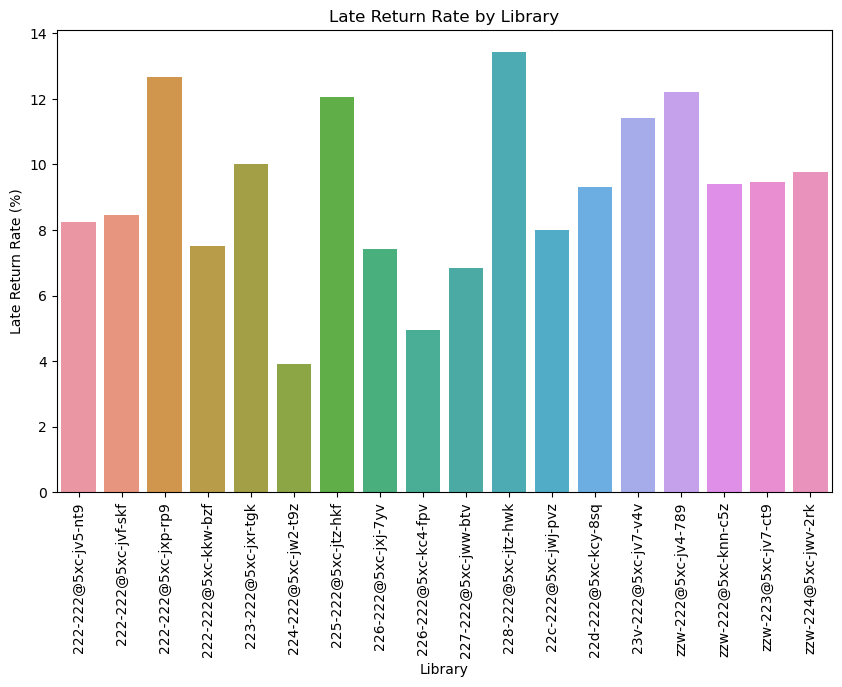

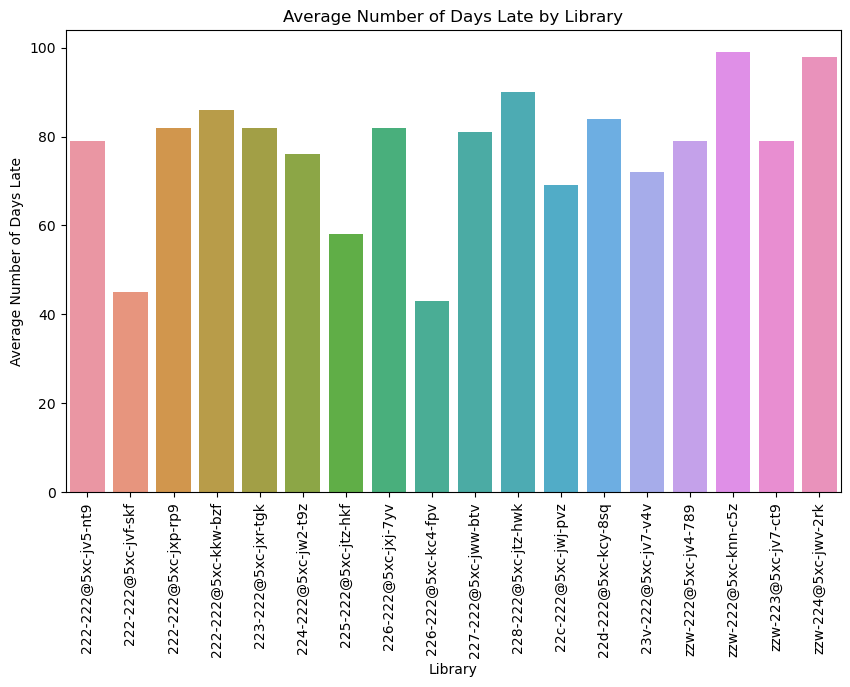

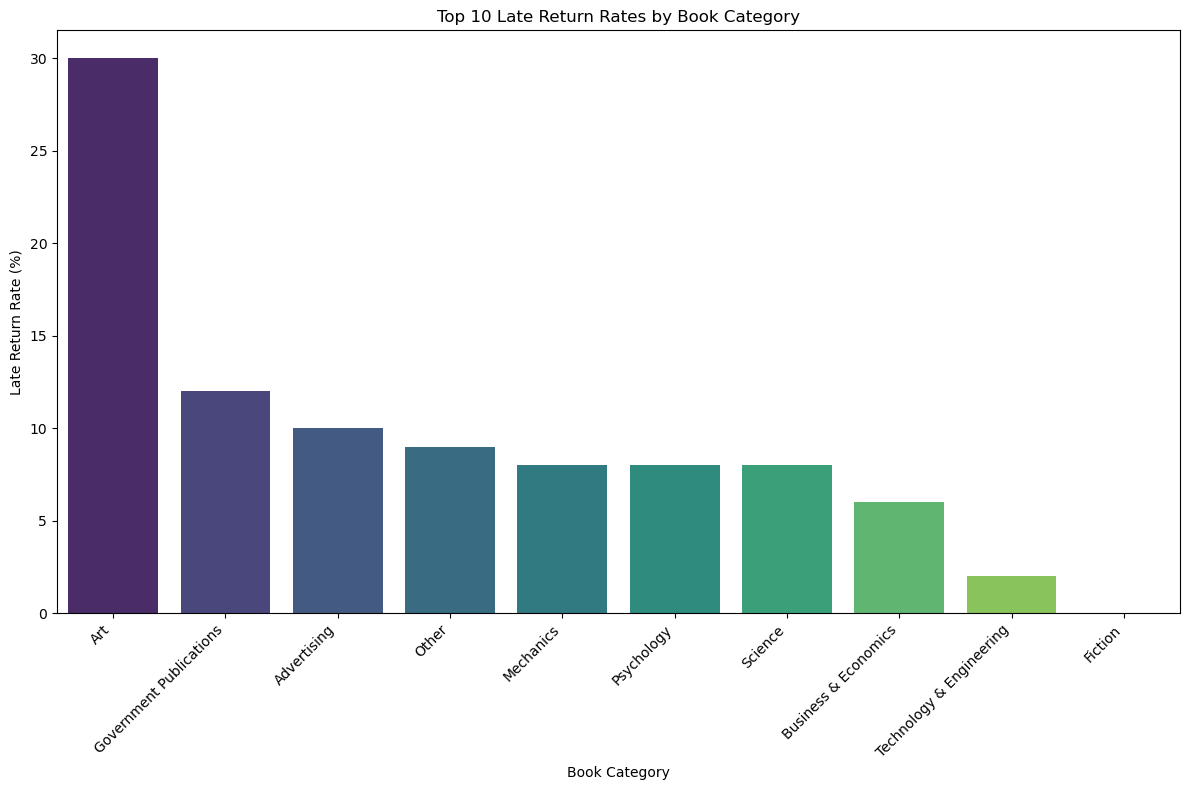

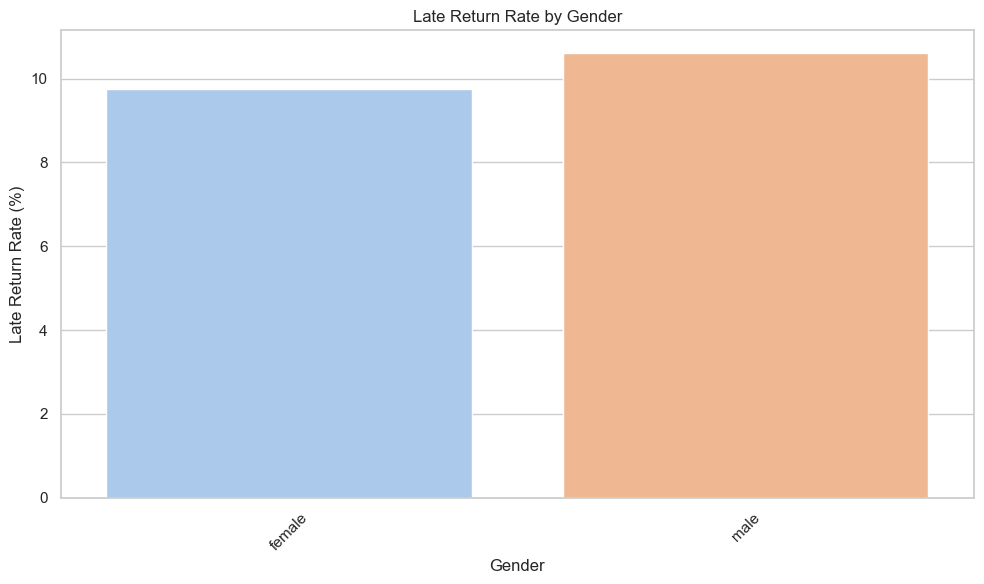

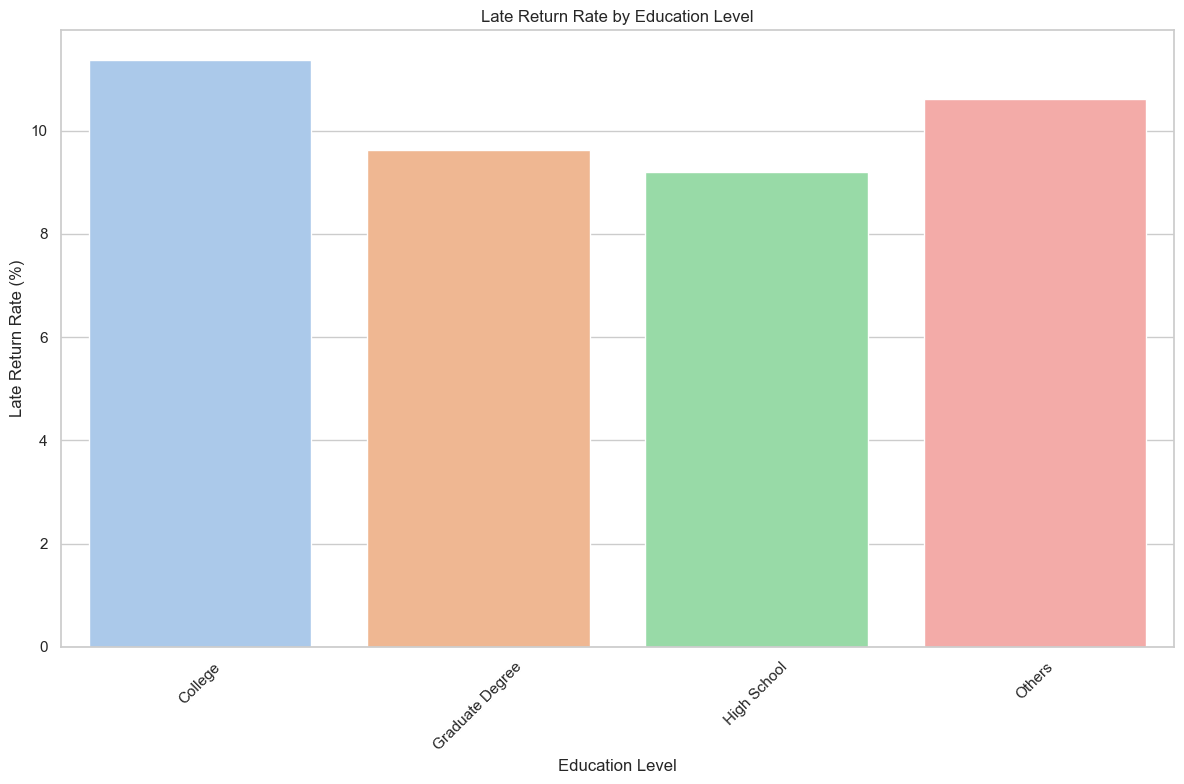

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Bar chart for Late Return Rate by Library
plt.figure(figsize=(10, 6))
sns.barplot(x=library_late_rate.index, y=library_late_rate.values)
plt.xlabel('Library')
plt.ylabel('Late Return Rate (%)')
plt.title('Late Return Rate by Library')
plt.xticks(rotation=90)
plt.show()



# Bar chart for Average Number of Days Late by Library
plt.figure(figsize=(10, 6))
sns.barplot(x=average_days_late_by_library.index, y=average_days_late_by_library.values)
plt.xlabel('Library')
plt.ylabel('Average Number of Days Late')
plt.title('Average Number of Days Late by Library')
plt.xticks(rotation=90)
plt.show()


# Bar chart for Late Return Rate by Book Category
plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.xlabel('Book Category')
plt.ylabel('Late Return Rate (%)')
plt.title('Top 10 Late Return Rates by Book Category')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Set up the plotting aesthetics
sns.set(style="whitegrid")

# Plot late return rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=late_return_by_gender.index, y=late_return_by_gender.values, palette="pastel")
plt.xlabel('Gender')
plt.ylabel('Late Return Rate (%)')
plt.title('Late Return Rate by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot late return rate by education level
plt.figure(figsize=(12, 8))
sns.barplot(x=late_return_by_education.index, y=late_return_by_education.values, palette="pastel")
plt.xlabel('Education Level')
plt.ylabel('Late Return Rate (%)')
plt.title('Late Return Rate by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Library Late Return Analysis Report

## Introduction
This report presents an analysis of library checkout data to identify key metrics related to the late return of books. The findings aim to provide insights into patterns and factors influencing late returns, facilitating informed decision-making to enhance library operations and customer satisfaction.

## Data Overview
We analyzed the following datasets:
- **Books**: Information about the books in the library.
- **Libraries**: Data on library branches.
- **Checkouts**: Records of book checkouts and returns.
- **Customers**: Demographic information of patrons.




## Factors Connected with Late Returns

#### 1. Library
Some libraries have a significantly higher rate of late returns. For instance:
- **Library ID: `228-222@5xc-jtz-hwk`** - Late return rate: 13.43%
- **Library ID: `zzw-222@5xc-knn-c5z`** - Late return rate: 9.41%

These libraries show higher late return rates compared to others, suggesting that there might be specific issues at these locations contributing to the higher rate of late returns.

#### 2. Book Category
Certain book categories have notably high late return rates. For example:
- **Categories: ["Art"]** - Late return rate: 30%
- **Categories: ['Government Publication']** - Late return rate: 12%

These categories have extremely high late return rates, which may indicate that these types of books are more prone to late returns, potentially due to their specific nature or the profile of users who check them out.

#### 3. Gender
There is a slight difference in late return rates between genders:
- **Male** - Late return rate: 10.62%
- **Female** - Late return rate: 9.75%

While the difference is relatively minor, this trend might warrant further investigation to understand any underlying factors.

#### 4. Education Level
The late return rate also varies by education level:
- **College Degree** - Late return rate: 11.37%
- **Graduate Degree** - Late return rate: 9.62%
- **High School** - Late return rate: 9.19%
- **Others** - Late return rate: 10.61%

Those with a College degree have a higher late return rate compared to other education levels. This could suggest that educational background plays a role, possibly related to differing levels of awareness or responsibility.



## Conclusions
Based on the analysis, the following key points were identified:
- The overall late return rate is 9.00%.
- The average number of days late is 78.50 days.
- Certain libraries and book categories have higher late return rates.

## Recommendations
To reduce the late return rate and improve library services, the following actions are recommended:
1. **Implement Reminder Systems**: Automated reminders via email or SMS could help patrons return books on time.
2. **Review Loan Policies**: Consider adjusting loan periods or introducing penalties for late returns to encourage timely returns.
3. **Target High-Risk Categories and Branches**: Focus on categories and branches with high late return rates for tailored interventions.
4. **Personalized Engagement**: Develop personalized engagement strategies for patrons with high late return rates, potentially offering incentives for timely returns.
5. **Education and Awareness Campaigns**: Launch campaigns to educate patrons on the importance of returning books on time and the impact on library operations.

## Next Steps
We recommend forming a task force to develop and implement the proposed interventions, with regular monitoring and evaluation to measure their effectiveness. Further analysis can be conducted to refine these strategies and address any emerging trends.
